In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score,roc_auc_score
from imblearn.over_sampling import SMOTE

p=pd.read_csv(r"C:\Users\usre\Downloads\parkinsons - parkinsons.csv")

In [7]:
p.tail()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306
194,phon_R01_S50_6,214.289,260.277,77.973,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,...,0.03078,0.04398,21.209,0,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569


In [35]:
p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [37]:
p.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [39]:
features = ['PPE', 'RPDE', 'DFA', 'HNR', 'MDVP:Fo(Hz)', 'MDVP:Jitter(%)', 'D2']
X = p[features]
y = p['status'] 

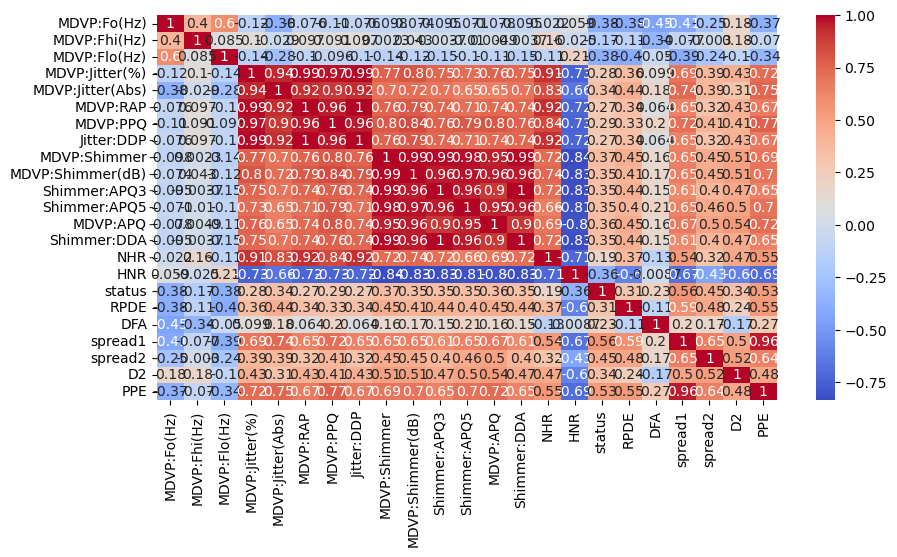

In [41]:
#Drop the identifier column
p = p.drop(columns=['name'])  # or 'filename' or 'id' — whatever column has values like 'phon_R01_S01_1'

# Compute correlation matrix
corr = p.corr()

# Plot heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

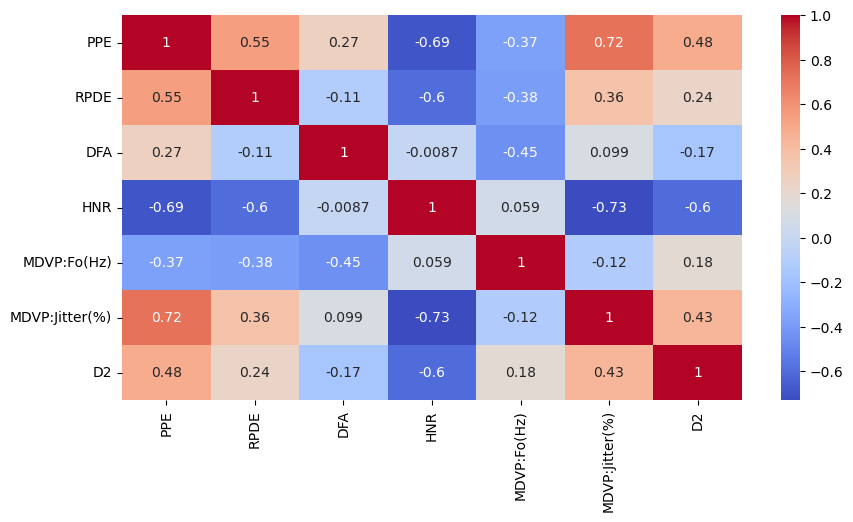

In [42]:
# Compute correlation matrix
fp=['PPE', 'RPDE', 'DFA', 'HNR', 'MDVP:Fo(Hz)', 'MDVP:Jitter(%)', 'D2']


corr = p[fp].corr()

# Plot heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

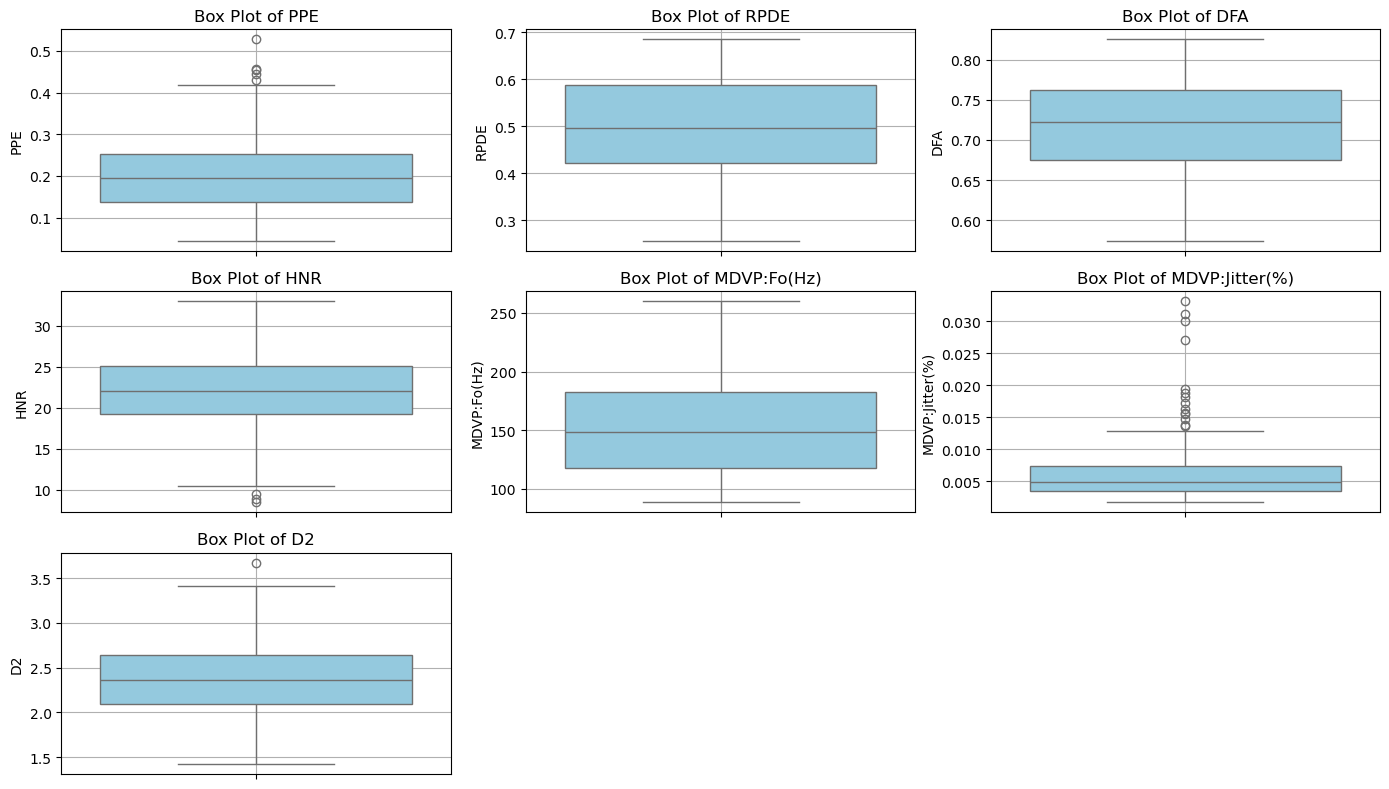

In [43]:
fp=['PPE', 'RPDE', 'DFA', 'HNR', 'MDVP:Fo(Hz)', 'MDVP:Jitter(%)', 'D2']

# Set plot size and layout
plt.figure(figsize=(14, 8))
for i, col in enumerate(fp):
    plt.subplot(3, 3, i+1)  # Changed grid size to 3x3
    sns.boxplot(y=p[col], color='skyblue')
    plt.title(f'Box Plot of {col}')
    plt.grid(True)
plt.tight_layout()
plt.show()


In [44]:
def cap_outliers(p, column):
    Q1 = p[column].quantile(0.25)
    Q3 = p[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    p[column] = p[column].clip(lower=lower_bound, upper=upper_bound)
    return p

# Apply to all selected features
for col in ['PPE', 'RPDE', 'DFA', 'HNR', 'MDVP:Fo(Hz)', 'MDVP:Jitter(%)', 'D2']:
    p = cap_outliers(p, col)


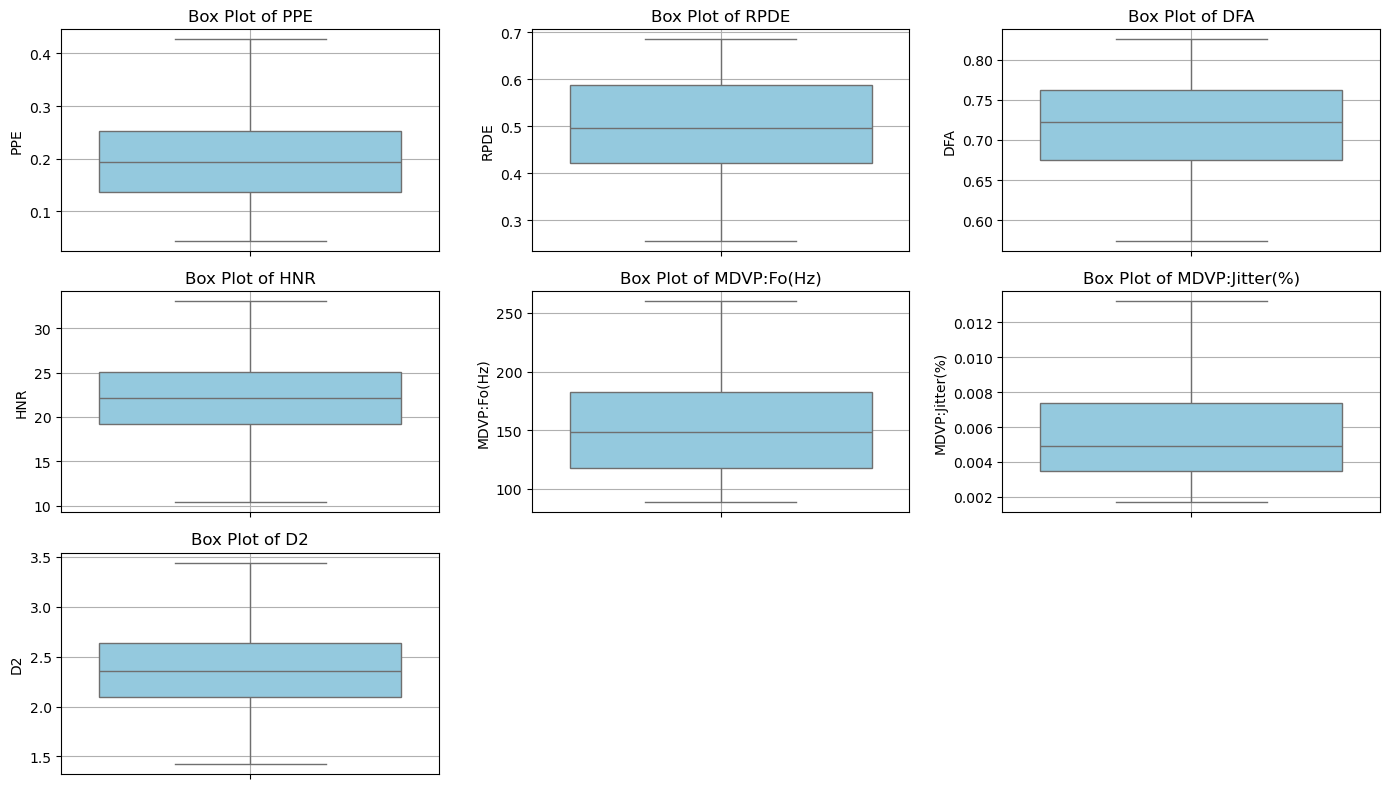

In [46]:
fp=['PPE', 'RPDE', 'DFA', 'HNR', 'MDVP:Fo(Hz)', 'MDVP:Jitter(%)', 'D2']
# Set plot size and layout
plt.figure(figsize=(14, 8))
for i, col in enumerate(fp):
    plt.subplot(3, 3, i+1)  # Changed grid size to 3x3
    sns.boxplot(y=p[col], color='skyblue')
    plt.title(f'Box Plot of {col}')
    plt.grid(True)
plt.tight_layout()
plt.show()


In [48]:
p['status'].value_counts()

status
1    147
0     48
Name: count, dtype: int64

In [57]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)


In [59]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [63]:
# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Use probabilities for class 1

# Evaluate the model

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Display metrics
print("✅ Accuracy:", accuracy)
print("\n📊 Classification Report:\n", class_report)
print("\n📊 Conf matrix:\n", conf_matrix)

print("🔍 ROC AUC Score:", roc_auc)



✅ Accuracy: 0.8983050847457628

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.87      0.81        15
           1       0.95      0.91      0.93        44

    accuracy                           0.90        59
   macro avg       0.86      0.89      0.87        59
weighted avg       0.90      0.90      0.90        59


📊 Conf matrix:
 [[13  2]
 [ 4 40]]
🔍 ROC AUC Score: 0.978030303030303


In [65]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5)
print("Cross-validation accuracy scores:", scores)
print("Mean accuracy:", scores.mean())


Cross-validation accuracy scores: [0.79487179 0.84615385 0.92307692 0.74358974 0.76923077]
Mean accuracy: 0.8153846153846154


In [67]:
import pickle

# Assuming you have a trained model (e.g., a RandomForestClassifier)import pickle

# Assume your new trained model is named `rf_model`
with open('random_forest_par_model.pkl', 'wb') as f:
    pickle.dump(model, f)
print("Random Forest model saved successfully!")

Random Forest model saved successfully!


In [69]:
import os
print("Current Working Directory:", os.getcwd())

Current Working Directory: C:\Users\usre
